In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
cab_df = pd.read_csv("cab_rides_DIC.csv",delimiter='\t',encoding = "utf-16")
weather_df = pd.read_csv("weather_DIC.csv",delimiter='\t',encoding = "utf-16")



In [2]:
cab_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [3]:
weather_df.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [4]:
cab_df['date_time'] = pd.to_datetime(cab_df['time_stamp']/1000, unit='s')
weather_df['date_time'] = pd.to_datetime(weather_df['time_stamp'], unit='s')
cab_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 08:46:40
1,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-12-16 08:46:40
2,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-12-16 08:46:40
3,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-12-16 08:46:40
4,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-12-16 08:46:40


In [5]:
cab_df['merge_date'] = cab_df.source.astype(str) +" - "+ cab_df.date_time.dt.date.astype("str") +" - "+ cab_df.date_time.dt.hour.astype("str")
weather_df['merge_date'] = weather_df.location.astype(str) +" - "+ weather_df.date_time.dt.date.astype("str") +" - "+ weather_df.date_time.dt.hour.astype("str")

In [6]:
weather_df.index = weather_df['merge_date']

In [7]:
cab_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,merge_date
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 08:46:40,Haymarket Square - 2018-12-16 - 8
1,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-12-16 08:46:40,Haymarket Square - 2018-12-16 - 8
2,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-12-16 08:46:40,Haymarket Square - 2018-12-16 - 8
3,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-12-16 08:46:40,Haymarket Square - 2018-12-16 - 8
4,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-12-16 08:46:40,Haymarket Square - 2018-12-16 - 8


In [8]:
merged_df = cab_df.join(weather_df,on=['merge_date'],rsuffix ='_w')

In [9]:
merged_df['rain'].fillna(0,inplace=True)

In [10]:
merged_df = merged_df[pd.notnull(merged_df['date_time_w'])]

In [11]:
merged_df = merged_df[pd.notnull(merged_df['price'])]

In [12]:
merged_df['day'] = merged_df.date_time.dt.dayofweek

In [13]:
merged_df['hour'] = merged_df.date_time.dt.hour

In [14]:
merged_df['day'].describe()

count    1.161392e+06
mean     2.389423e+00
std      1.759752e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      6.000000e+00
Name: day, dtype: float64

In [15]:
merged_df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date_time',
       'merge_date', 'temp', 'location', 'clouds', 'pressure', 'rain',
       'time_stamp_w', 'humidity', 'wind', 'date_time_w', 'merge_date_w',
       'day', 'hour'],
      dtype='object')

In [16]:
merged_df.count()

distance            1161392
cab_type            1161392
time_stamp          1161392
destination         1161392
source              1161392
price               1161392
surge_multiplier    1161392
id                  1161392
product_id          1161392
name                1161392
date_time           1161392
merge_date          1161392
temp                1161392
location            1161392
clouds              1161392
pressure            1161392
rain                1161392
time_stamp_w        1161392
humidity            1161392
wind                1161392
date_time_w         1161392
merge_date_w        1161392
day                 1161392
hour                1161392
dtype: int64

In [17]:
X = merged_df[merged_df.product_id=='lyft_line'][['day','distance','hour','temp','clouds', 'pressure','humidity', 'wind', 'rain']]

In [18]:
X.count()

day         91041
distance    91041
hour        91041
temp        91041
clouds      91041
pressure    91041
humidity    91041
wind        91041
rain        91041
dtype: int64

In [19]:
y = merged_df[merged_df.product_id=='lyft_line']['price'] 

In [20]:
y.count()

91041

In [21]:
X.reset_index(inplace=True)
X = X.drop(columns=['index'])

In [22]:
X.head()

,day,distance,hour,temp,clouds,pressure,humidity,wind,rain
0,6,0.44,8,39.36,0.39,1022.44,0.74,8.14,0.0000
1,1,1.08,0,43.96,1.00,1006.26,0.90,9.86,0.0497
2,1,1.08,0,43.83,0.97,1005.90,0.91,10.93,0.2173
3,1,1.08,0,43.82,0.97,1005.87,0.91,11.02,0.2039
4,1,1.08,0,43.82,0.97,1005.89,0.91,10.94,0.2154


In [23]:
features = pd.get_dummies(X)

In [24]:
features.columns

Index(['day', 'distance', 'hour', 'temp', 'clouds', 'pressure', 'humidity',
       'wind', 'rain'],
      dtype='object')

In [25]:
import numpy as np
labels = np.array(y)
feature_list = list(features.columns)
features = np.array(features)

In [26]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (68280, 9)
Training Labels Shape: (68280,)
Testing Features Shape: (22761, 9)
Testing Labels Shape: (22761,)


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

model = LinearRegression()

model.fit(train_features, train_labels)

y_pred = model.predict(test_features)

mae = mean_absolute_error(test_labels, y_pred)
mse = mean_squared_error(test_labels, y_pred)
r2 = r2_score(test_labels, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Absolute Error (MAE): 1.0064112909506886
Mean Squared Error (MSE): 1.946070520123545
R-squared (R2) Score: 0.5590252278793093
Coefficients: [ 1.67680080e-01  1.35158164e+00  4.30150141e-02 -3.42806757e-02
  3.40415587e-01 -8.66550393e-04 -3.71067669e-01  1.43296475e-02
 -3.44529005e+00]
Intercept: 4.3889258267770455


In [39]:
errors = abs(y_pred - test_labels)
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 80.02 %.


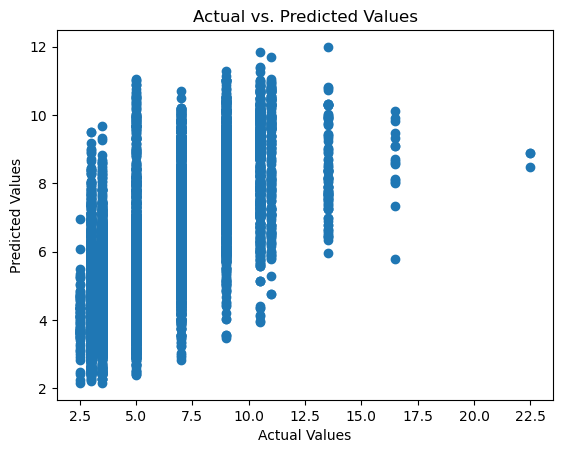

In [40]:
import matplotlib.pyplot as plt
plt.scatter(test_labels, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = KNeighborsRegressor(n_neighbors=5)

model.fit(train_features, train_labels)

y_pred = model.predict(test_features)

mae = mean_absolute_error(test_labels, y_pred)
mse = mean_squared_error(test_labels, y_pred)
r2 = r2_score(test_labels, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
errors = abs(y_pred - test_labels)
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error (MAE): 0.5252097886736085
Mean Squared Error (MSE): 0.9463762576336717
R-squared (R2) Score: 0.7855534780291792
Accuracy: 90.25 %.


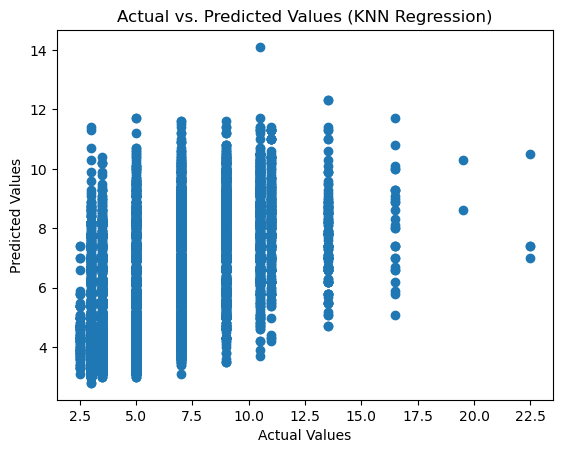

In [43]:
import matplotlib.pyplot as plt

plt.scatter(test_labels, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (KNN Regression)")
plt.show()


In [134]:

from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels);

In [135]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.44 degrees.


In [136]:
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 91.86 %.


In [137]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: distance             Importance: 0.66
Variable: pressure             Importance: 0.1
Variable: day                  Importance: 0.07
Variable: hour                 Importance: 0.05
Variable: temp                 Importance: 0.05
Variable: wind                 Importance: 0.03
Variable: clouds               Importance: 0.02
Variable: humidity             Importance: 0.02
Variable: rain                 Importance: 0.01


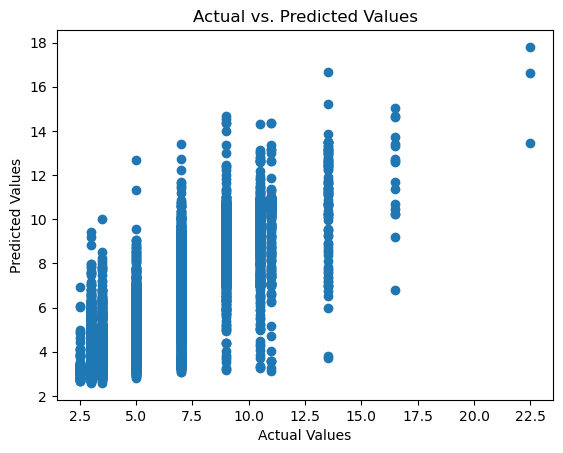

In [138]:
import matplotlib.pyplot as plt
plt.scatter(test_labels, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1)
est.fit(train_features, train_labels);


In [59]:
predictions = est.predict(test_features)
errors = abs(predictions - test_labels)

mae = mean_absolute_error(predictions, y_pred)
mse = mean_squared_error(predictions, y_pred)
r2 = r2_score(predictions, y_pred)
errors = abs(y_pred - test_labels)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
errors = abs(predictions - test_labels)
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error (MAE): 0.47972634575474615
Mean Squared Error (MSE): 0.47579712009124897
R-squared (R2) Score: 0.8566757099193683
Accuracy: 87.49 %.


In [60]:
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 87.49 %.


In [61]:
importances = list(est.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: distance             Importance: 0.71
Variable: day                  Importance: 0.08
Variable: pressure             Importance: 0.07
Variable: hour                 Importance: 0.05
Variable: temp                 Importance: 0.03
Variable: rain                 Importance: 0.03
Variable: wind                 Importance: 0.02
Variable: clouds               Importance: 0.01
Variable: humidity             Importance: 0.01


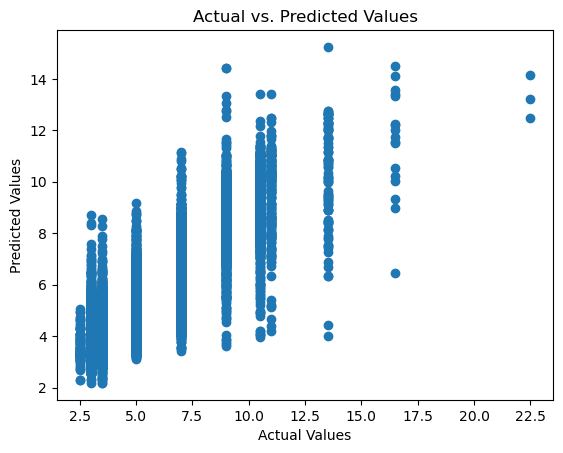

In [62]:
import matplotlib.pyplot as plt

plt.scatter(test_labels, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  # Import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = DecisionTreeRegressor(random_state=0) 
model.fit(train_features, train_labels)
y_pred = model.predict(test_features)
errors = abs(y_pred - test_labels)
mae = mean_absolute_error(test_labels, y_pred)
mse = mean_squared_error(test_labels, y_pred)
r2 = r2_score(test_labels, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error (MAE): 0.42436548213123276
Mean Squared Error (MSE): 1.0060472645218472
R-squared (R2) Score: 0.7720321752846852
Accuracy: 92.1 %.


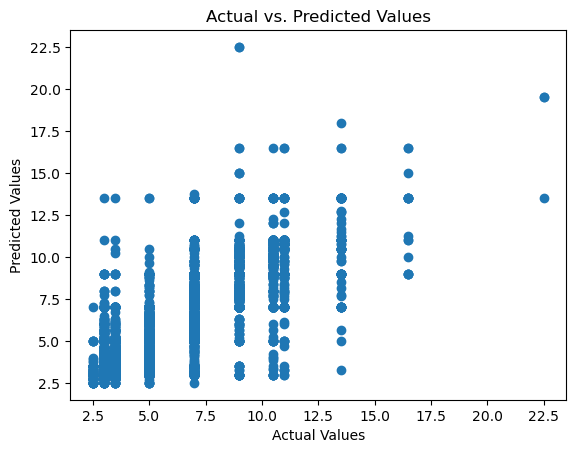

In [148]:
import matplotlib.pyplot as plt
plt.scatter(test_labels, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [65]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor  # You can replace this with your choice of base regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.2, random_state=0)

base_regressor = DecisionTreeRegressor()

bagging_regressor = BaggingRegressor(base_regressor, n_estimators=100, random_state=0)  # You can adjust hyperparameters as needed

bagging_regressor.fit(train_features, train_labels)
y_pred = bagging_regressor.predict(test_features)
errors = abs(y_pred - test_labels)
mae = mean_absolute_error(test_labels, y_pred)
mse = mean_squared_error(test_labels, y_pred)
r2 = r2_score(test_labels, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error (MAE): 0.4386696026785889
Mean Squared Error (MSE): 0.788320478963944
R-squared (R2) Score: 0.8213685270012056
Accuracy: 91.84 %.


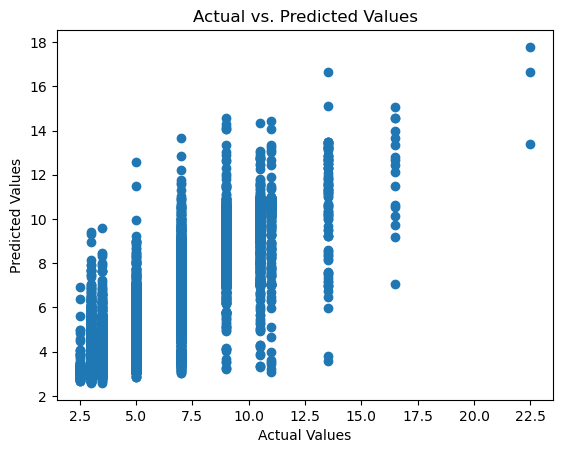

In [66]:
import matplotlib.pyplot as plt
plt.scatter(test_labels, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()